# IMPORT LIBRARY

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# DATASET

## Preparing the dataset


In [32]:
# Load the metadata CSV file
metadata_file_path = 'dataset/ISIC2020/train/ISIC_2020_Training_GroundTruth_v2.csv' 
metadata = pd.read_csv(metadata_file_path)

# Define the path to the images
images_folder_path = 'dataset/ISIC2020/train/train_images'

# Add file extension to image names (if not already present)
metadata['image_name'] = metadata['image_name'].apply(lambda x: f"{x}.jpg")

# Map benign and malignant labels to '0' and '1' as strings
metadata['label'] = metadata['benign_malignant'].map({'benign': '0', 'malignant': '1'})

# Split metadata into training and validation sets
train_metadata, val_metadata = train_test_split(metadata, test_size=0.2, random_state=42)

# Define ImageDataGenerator for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Rescale images to [0, 1]
    rotation_range=20,    # Randomly rotate images
    width_shift_range=0.2, # Randomly translate images horizontally
    height_shift_range=0.2, # Randomly translate images vertically
    shear_range=0.2,      # Randomly shear images
    zoom_range=0.2,       # Randomly zoom images
    horizontal_flip=True, # Randomly flip images horizontally
    fill_mode='nearest'   # Fill pixels after transformations
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_metadata,
    directory=images_folder_path,
    x_col='image_name',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_metadata,
    directory=images_folder_path,
    x_col='image_name',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 26499 validated image filenames belonging to 2 classes.
Found 6626 validated image filenames belonging to 2 classes.


/opt/anaconda3/envs/cvproj/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


## Display Basic Statistic

Class Distribution in Training Set:
benign_malignant
benign       26035
malignant      465
Name: count, dtype: int64

Class Distribution in Validation Set:
benign_malignant
benign       6507
malignant     119
Name: count, dtype: int64

Age Statistics in Training Set:
count    26444.000000
mean        48.833951
std         14.381341
min         10.000000
25%         40.000000
50%         50.000000
75%         60.000000
max         90.000000
Name: age_approx, dtype: float64

Sample Training Images:


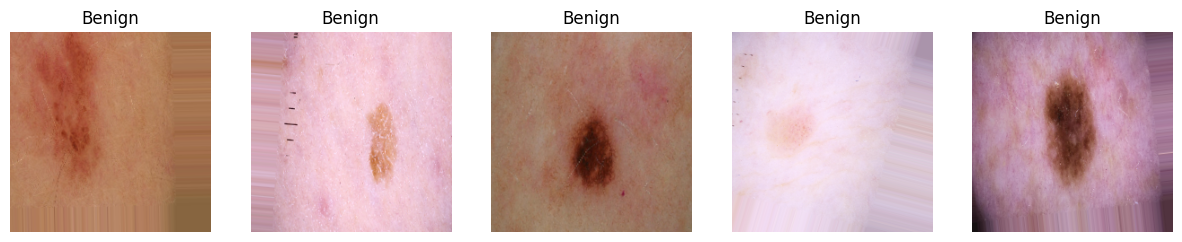

In [34]:
print("Class Distribution in Training Set:")
print(train_metadata['benign_malignant'].value_counts())

print("\nClass Distribution in Validation Set:")
print(val_metadata['benign_malignant'].value_counts())

print("\nAge Statistics in Training Set:")
print(train_metadata['age_approx'].describe())

# Display sample images with labels
def show_sample_images(generator, num_samples=5):
    images, labels = next(generator)
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title('Malignant' if labels[i] == '1' else 'Benign')
        plt.axis('off')
    plt.show()

print("\nSample Training Images:")
show_sample_images(train_generator)

## Dataset Preprocessing 